In [ ]:
import pandas as pd
import numpy as np
url= "https://raw.githubusercontent.com/ousuga/Proyecto1_IAN/main/precios_pdtos_agricolas.cvs"
datos_1= pd.read_csv(url)
df = pd.DataFrame(datos_1)
df

# **Redefinición del tipo de variable y identificacion de datos faltantes**

In [ ]:
#se observa el tipo de variable
df.dtypes

In [ ]:
#media = df["precio"].mean()
#mediana = df["precio"].median()
# moda = df["precio"].mode()

In [ ]:
#IDENTIFICACION DE DATOS FALTANTES
# Muestra los valores no faltantes y el tipo de dato
df.info()
#se observa que omite los "n.d." como datos faltantes
df = df.replace('n.d.', np.nan)
df
#con el comando anterior ya esos datos son tomados como valores faltantes
df.info()

In [ ]:
#eleminacion de datos faltantes
df_faltantes = df.dropna()

In [ ]:
#se observa el tipo de variable
df_faltantes.dtypes
# Cambia el tipo de dato de la columna "precio"
df_faltantes["precio"] = df_faltantes["precio"].astype("int")

# Cambia el tipo de dato de la columna "variabilidad"
df_faltantes["variabilidad"] = df_faltantes["variabilidad"].astype("float")

df_faltantes.dtypes

In [ ]:
df_faltantes

,producto,ciudad,precio,variabilidad,fecha,LATITUD,LONGITUD
0,Arveja verde en vaina,armenia,7200.0,0.10,01ago2023,6.163684,-75.809955
1,Arveja verde en vaina,armenia,7200.0,0.10,01ago2023,4.499501,-75.724900
3,Arveja verde en vaina,bucaramanga,6860.0,0.08,01ago2023,7.155834,-73.111570
4,Arveja verde en vaina,cali,7733.0,-0.03,01ago2023,3.399044,-76.576493
6,Arveja verde en vaina,ibagué,6000.0,-0.01,01ago2023,4.451921,-75.252591
...,...,...,...,...,...,...,...
9228,Yuca*,armenia,1640.0,0.00,29ago2023,6.163684,-75.809955
9229,Yuca*,armenia,1640.0,0.00,29ago2023,4.499501,-75.724900
9231,Yuca*,bucaramanga,2690.0,0.05,29ago2023,7.155834,-73.111570
9235,Yuca*,medellín,1650.0,0.06,29ago2023,6.257590,-75.611031


# **Identificacion de datos duplicados y tratamientos**


In [ ]:
#IDENTIFICACION DE DATOS DUPLICADOS

# Identificar filas duplicadas
duplicados = df_faltantes.duplicated()

# Imprimir las filas duplicadas, mostrando cada columna
print(duplicados)

#se decide eliminarlas

# Por defecto mantiene el primer registro y elimina las demás duplicados
df_fs_dp = df_faltantes.drop_duplicates()

0       False
1       False
3       False
4       False
6       False
        ...  
9228    False
9229    False
9231    False
9235    False
9237    False
Length: 5516, dtype: bool


In [ ]:
df_fs_dp

,producto,ciudad,precio,variabilidad,fecha,LATITUD,LONGITUD
0,Arveja verde en vaina,armenia,7200,0.10,01ago2023,6.163684,-75.809955
1,Arveja verde en vaina,armenia,7200,0.10,01ago2023,4.499501,-75.724900
3,Arveja verde en vaina,bucaramanga,6860,0.08,01ago2023,7.155834,-73.111570
4,Arveja verde en vaina,cali,7733,-0.03,01ago2023,3.399044,-76.576493
6,Arveja verde en vaina,ibagué,6000,-0.01,01ago2023,4.451921,-75.252591
...,...,...,...,...,...,...,...
9228,Yuca*,armenia,1640,0.00,29ago2023,6.163684,-75.809955
9229,Yuca*,armenia,1640,0.00,29ago2023,4.499501,-75.724900
9231,Yuca*,bucaramanga,2690,0.05,29ago2023,7.155834,-73.111570
9235,Yuca*,medellín,1650,0.06,29ago2023,6.257590,-75.611031


# **Identificación de datos outliers**

In [ ]:
# función describe para identificar diferencias entre las medidas descriptivas
df_fs_dp['precio'].describe()

count     5516.000000
mean      3106.091733
std       1919.119383
min        339.000000
25%       1667.000000
50%       2727.000000
75%       3875.000000
max      10000.000000
Name: precio, dtype: float64

Text(0, 0.5, '')

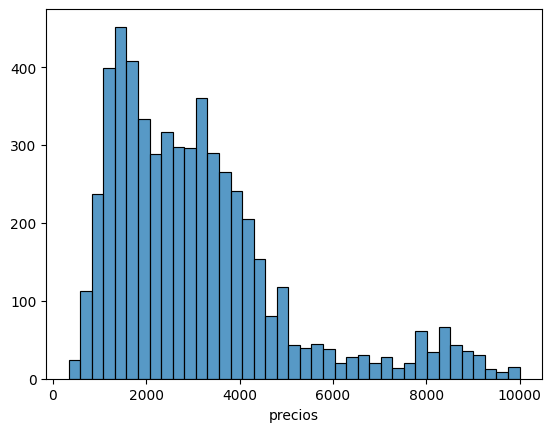

In [ ]:
#identificacion de outliar
# Importar libreria seaborn
import seaborn as sns

# Crear un histograma usando Seaborn
fig = sns.histplot(data = df_fs_dp, x = 'precio')
# Adicionar nombres a ejes
fig.set_xlabel('precios')
fig.set_ylabel('')

Text(0.5, 0, 'precio')

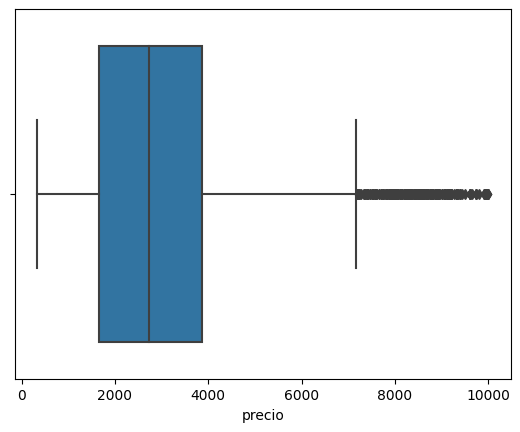

In [ ]:
# Crear un boxplot
fig = sns.boxplot(data = df_fs_dp, x = 'precio')

# Adicionar el título
fig.set_xlabel('precio')

In [ ]:
# Calcular cuartiles a partir de la función percentil
Q3 = df_fs_dp['precio'].quantile(0.75) # Tercer cuartil = Percentil 75
Q1 = df_fs_dp['precio'].quantile(0.25) # Primer cuartil + Percentil 25

# Obtener RIC
ric = Q3 - Q1

# Definir limite inferior y superior
superior = Q3 + (1.5 * ric)
inferior = Q1 - (1.5* ric)

# Identificar outliers
outliers_RIC = df_fs_dp[(df_fs_dp['precio'] < inferior) | (df_fs_dp['precio'] > superior)]
outliers_RIC

,producto,ciudad,precio,variabilidad,fecha,LATITUD,LONGITUD
0,Arveja verde en vaina,armenia,7200,0.10,01ago2023,6.163684,-75.809955
1,Arveja verde en vaina,armenia,7200,0.10,01ago2023,4.499501,-75.724900
4,Arveja verde en vaina,cali,7733,-0.03,01ago2023,3.399044,-76.576493
175,Coco,medellín,8483,0.01,01ago2023,6.257590,-75.611031
183,Granadilla,bucaramanga,7500,-0.09,01ago2023,7.155834,-73.111570
...,...,...,...,...,...,...,...
9088,Manzana royal gala,cali,7807,0.00,29ago2023,3.399044,-76.576493
9090,Manzana royal gala,ibagué,9123,0.00,29ago2023,4.451921,-75.252591
9091,Manzana royal gala,medellín,8224,0.01,29ago2023,6.257590,-75.611031
9092,Manzana royal gala,neiva,9079,0.00,29ago2023,2.993360,-75.272362


In [ ]:
# Imputación de outliers con la mediana

# Calcular la mediana
mediana = df_fs_dp['precio'].median()

# Imputar outliers ecnontrados con z-score modificado con la mediana
taxis_imputado = df_fs_dp.copy()
taxis_imputado.loc[outliers_RIC.index, 'precio'] = mediana
taxis_imputado

# **categorizacion**

In [ ]:
import pandas as pd

# Importar la base de datos

# Obtener el valor mínimo
min_precio = df_fs_dp["precio"].min()

# Obtener el valor máximo
max_precio = df_fs_dp["precio"].max()

# Imprimir los resultados
print("El valor mínimo de precio es:", min_precio)
print("El valor máximo de precio es:", max_precio)

El valor mínimo de precio es: 339
El valor máximo de precio es: 10000


In [ ]:
# Definir las categorías
categorias = ["bajo", "medio", "alto"]

# Categorizar la variable `precio`
df_fs_dp["precio_cat"] = pd.qcut(df_fs_dp["precio"], 3, labels=categorias)

# Mostrar la base de datos categorizada
df_fs_dp

In [ ]:
df_fs_dp['precio_cat'].describe()

count      5516
unique        3
top       medio
freq       1851
Name: precio_cat, dtype: object

# **graficas**

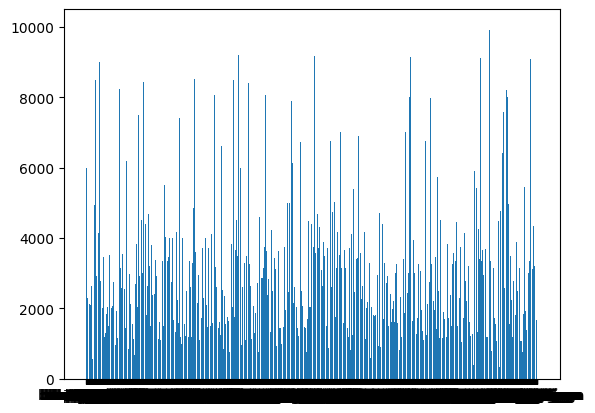

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Obtener los precios del DataFrame
precios = df_fs_dp["precio"].tolist()

# Crear una lista de barras con los nombres de los productos
barras = df_fs_dp["ciudad"].tolist()

# Crear la posición y de las barras en el gráfico
y_pos = np.arange(len(barras))

# Crear las barras
plt.bar(y_pos, precios)

# Crear los nombres en el eje x
plt.xticks(y_pos, barras)

# Mostrar el gráfico
plt.show()